## Hypothesis testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- **Has the network latency gone up since we switched internet service providers?**

$H_0$: There is not relationship between the network speed and switching the internet service providers

$H_a$: The network speed decreased after switching internet service providers

*True negative:* There is no relationship between the internet service providers and network speed, and we don't switch provider back

*True positive:* The network speed decreased after switching internet providers and we returned to the previous provider

*Type I error (False positive):* The network speed didn't change but we thought different and returned to the old provider

*Type II error (False negative):* The network speed decreased but we didn't confirm it and stayed with the new internet service provider

In [1]:
#class solution

Variables: discrete and continuous. Testing difference

$H_0$: $\mu(latency_a) <= \mu(latency_b)$

$H_a$: $\mu(latance_a) > \mu(latency_b)$

*True positive:* latency went up and we said it went up

*True negative:* latency didn't go up and we said it didn't go up

*Type I (False positive):* latency didn't go up but we said it did

*Type II (False negative):* latency did go up, but we said it didn't

- **Is the website redesign any good?**

$H_0$: There is no difference between the time visitors spend on the site before and after the redesign

$H_a$: Visitors spend more time on the site after it was redesigned

*True negative:* There is no difference between site redesign and increasing of time spending on the site, updating of the site is not needed

*True positive:* There is a differerence between the redesign and the time visitors spend time on the site, we need to update

*Type I error (False positive):* There is no difference between site redesign and increasing of time spending on the site, but we thought differently and spent exra money on the site update

*Type II error (False negative):* There is a differerence between the redesign and the time visitors spend time on the site, but we didn't recognize it and missed the opportunity to update our site

In [ ]:
#class 

Variables discrete (old and new design) and conitnuos (time spent ob the web site)

$H-0$: time spent on the old site >= time spent on the new site

$H_a$: time spent on the old site < time spent on the new site

*TP:* Visiotrs spend more time on the new site and we said so

*TN:* Visitors spend less or equal time and we said 

*T1:* We said the site is better but it's not

*T2:* Time spent increased but we still concoder the redesign bad

- **Is our television ad driving more sales?**

$H_0$: The amount of sales didn't change since the beginning of tv marketing campaign 

$H_a$: There is an increase of sales since the beginning of tv marketing campaign 

*True negative:* The amount of sales didn't change since the beginning of tv marketing campaign and we don't continue this campaign

*True positive:* The amount of sales increased since the beginning of tv marketing campaign and we continue this campaign

*Type I error (False positive):* The amount of sales didn't change since the beginning of tv marketing campaign but we decided to continue this campaign

*Type II error (False negative):* The amount of sales increased since the beginning of tv marketing campaign but we cancel the campaign 

Discrete var (pre-ads), continuous var (sales)
$H_0$: avg pre-ad >= avg post-ad

$H_a$: avg pre-ad < avg post-ad

*TP:* sales increased after ad and we said that

*TN:* sales didn't

*T1:* sales didn't increase, but we said they did

*T2:* ads seem to work but we didn't think so

### Part 2

1. **Answer with the type of test you would use (assume normal distribution):**

- Is there a difference in grades of students on the second floor compared to grades of all students?

*Two tailed one sample T-test ```scipy.stats.ttest_1samp```, check if* $p-value < \alpha$

- Are adults who drink milk taller than adults who dont drink milk?

*One tailed two sampled (or independent) T-test ```stats.ttest_ind```. Check if all assumptions met. In case we can not apply T-test, use Mann-Whitney U test ```stats.mannwhitneyu```*

- Is the the price of gas higher in texas or in new mexico?

*Same as above. One tailed two sampled (or independent) T-test ```stats.ttest_ind```. Preferable to use T-test and pass ```equal_var == False``` in case variances differ a lot.*

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

*If all assumptions met (independent samples, equal variances, normal distribution) we use ANOVA analysis ```stats.f_oneway```, otherwise Kruskall Wallis test ```stats.kruskal```

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

2. **Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.**

$H_0$: there is no significant difference in the average time it takes for office 1 and office 2 to sell homes

$H_a$: there is a difference in the time it take to sell homes for office 1 and office 2

In [11]:
office1 = stats.norm(90, 15).rvs(40).astype(int)
office2 = stats.norm(100, 20).rvs(50).astype(int)

$H_0$: AVG time (office1) == AVG time (office2)

$H_a$: AVG time (office1) == AVG time (office2)

In [55]:
#significance level = 0.05

α = 0.05

In [ ]:
x = np.arange(50, 150)

y1 = stats.norm
plt.plot(x, 1)

Verify assumptions for 2-tailed independent T-test (indepent, normal). To verify that variances are equal run Levene test. Return the 2nd value, which is going to be p-value for variances. If the returned result > 0.05, we can assume that variances are equal:

In [19]:
stats.levene(office1, office2)[1]

0.18243347772960214

P-value for variances is 0.18 and it's bigger that 0.05, we can use paraetric T-test

In [69]:
#run the Independent T-test
t, p = stats.ttest_ind(office1, office2)
(t, p)

(-2.1038439883896936, 0.038245315037194326)

In [87]:
if p < α and t < 0:
    print('There is a difference in the time it takes to sell homes. It takes more time for office # 2')
elif p < α and t > 0:
    print('There is a difference in the time it takes to sell homes. It takes more time for office # 1')
else:
    print('There is no significant difference in the time it takes to sell homes between 2 offices. \
We fail to reject the Null Hypothesis.')

There is a difference in the time it takes to sell homes. It takes more time for office # 2


In [88]:
office1.mean()

89.875

In [89]:
office2.mean()

97.86

In [86]:
office1.mean() < office2.mean()

True

2. **Load the mpg dataset and use it to answer the following questions:**

In [32]:
mpg = data('mpg')

In [33]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

 Two tailed, two sampled.
 
 $H_0$: fuel_eff(1999) == fuel_eff(2008), there is no difference in fuel efficience in cars from 2008 vs 1999
 
 $H_a$: fuel_eff(1999) != fuel_eff(2008, there is no difference in fuel efficience in cars from 2008 vs 1999

Harmonic mean

$2 / (1/cty + 1/hwy)$

In [90]:
#harmonic mean
mpg['fuel_eff'] =  round(2 / ((1/mpg.hwy) + (1/mpg.cty)), 2)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.21
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.36
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.31
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.71
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.81


In [41]:
models1999 = mpg[mpg.year == 1999].fuel_eff

In [44]:
models1999.head()

1    22.21
2    24.36
5    19.81
6    21.27
8    21.27
Name: fuel_eff, dtype: float64

In [46]:
models2008 = mpg[mpg.year == 2008].fuel_eff

In [52]:
#check if variances are equal
stats.levene(models1999, models2008)[1] 
#p-value is 0.86, we can consider variances eual and use ind. T-tes

0.8604763910415811

$H_0$: models1999 == models2008

$H_a$: models1999 != models2008

In [73]:
t1, p1 = stats.ttest_ind(models1999, models2008)
(t1, p1)

(0.29976841281243016, 0.7646222117552022)

In [96]:
models1999.mean(), models2008.mean()

(19.681452991452982, 19.488632478632482)

In [75]:
if p1 / 2 < α and t1 > 0:
    print('Cars from 1999 are more fuel efficient')
if p1 / 2 < α and t1 < 0:
    print('Cars from 2008 were more fuel efficient')

else:
    print('There is no significant difference in the fuel efficiency between cars from 1999 and cars from 2008')

There is no significant difference in the fuel efficiency between cars from 1999 and cars from 2008


- Are compact cars more fuel-efficient than the average car?

$H_0$: compact eff <= avg eff

$H_a$: compact eff > avg eff

One tailed, 1 sampled t-test

In [58]:
total_mean = round(mpg.fuel_eff.mean(), 2)
total_mean

19.59

In [63]:
compact_cars.mean()

23.500212765957446

In [60]:
compact_cars = mpg[mpg['class'] == 'compact'].fuel_eff
compact_cars.head()

1    22.21
2    24.36
3    24.31
4    24.71
5    19.81
Name: fuel_eff, dtype: float64

In [94]:
compact_cars.count() #sample size is big enough

47

In [62]:
tcompact, pcompact = stats.ttest_1samp(compact_cars, total_mean)
(tcompact, pcompact)

(7.5022246266558446, 1.6170060887332524e-09)

In [95]:
# We use one tailed test, p-value / 2 < alpha
if pcompact/ 2 < α and tcompact < 0:
    print('Compact cares are less fuel efficient')
if pcompact/ 2 < α and tcompact > 0:
    print('Compact cares are more fuel efficient')
else:
    print('There is no significant difference in the fuel efficiency between compact cars and other cars')

Compact cares are more fuel efficient


- Do manual cars get better gas mileage than automatic cars?

$H_0$: fuel_eff(manual) <= fuel_eff(auto)

$H_a$: fuel_eff(manual) > fuel_eff(auto)

*One tailed, 2 sampled*

In [78]:
manual = mpg[mpg.trans.str.contains('manual')].fuel_eff

In [80]:
auto = mpg[mpg.trans.str.contains('auto')].fuel_eff

In [81]:
stats.levene(manual, auto)[1] # p-value > alpha, variances are ok

0.9068872019462125

In [82]:
ttrans, ptrans = stats.ttest_ind(manual, auto)
(ttrans, ptrans)

(4.652099934834949, 5.522151036980458e-06)

In [83]:
if ptrans / 2 < α and ttrans > 0:
    print('The manual cars get better gas mileage')
else:
    print('There is no difference')

The manual cars get better gas mileage


### Part 3

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot? - *Pearson R test*

- Do guys and gals quit their jobs at the same rate? - *Pearson R test*

- Does the length of time of the lecture correlate with a students grade? - *Pearson R*

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

2. Use the telco_churn data.

In [120]:
url = get_db_url('telco_churn')
sql = '''
SELECT c.tenure, c.monthly_charges, c.total_charges, c. phone_service, ist.internet_service_type
FROM customers c
JOIN internet_service_types ist USING (internet_service_type_id)
WHERE tenure != 0;
'''

In [121]:
telco_df = pd.read_sql(sql, url)

In [122]:
telco_df.head()

,tenure,monthly_charges,total_charges,phone_service,internet_service_type
0,9,65.6,593.3,Yes,DSL
1,9,59.9,542.4,Yes,DSL
2,4,73.9,280.85,Yes,Fiber optic
3,13,98.0,1237.85,Yes,Fiber optic
4,3,83.9,267.4,Yes,Fiber optic


In [123]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7032 non-null   int64  
 1   monthly_charges        7032 non-null   float64
 2   total_charges          7032 non-null   object 
 3   phone_service          7032 non-null   object 
 4   internet_service_type  7032 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 274.8+ KB


In [124]:
# convert string to float
telco_df['total_charges'] = telco_df.total_charges.astype(float)

In [126]:
telco_df.head(2)

,tenure,monthly_charges,total_charges,phone_service,internet_service_type
0,9,65.6,593.3,Yes,DSL
1,9,59.9,542.4,Yes,DSL


In [125]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7032 non-null   int64  
 1   monthly_charges        7032 non-null   float64
 2   total_charges          7032 non-null   float64
 3   phone_service          7032 non-null   object 
 4   internet_service_type  7032 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 274.8+ KB


In [139]:
telco_df.describe()

,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


- Does tenure correlate with monthly charges?

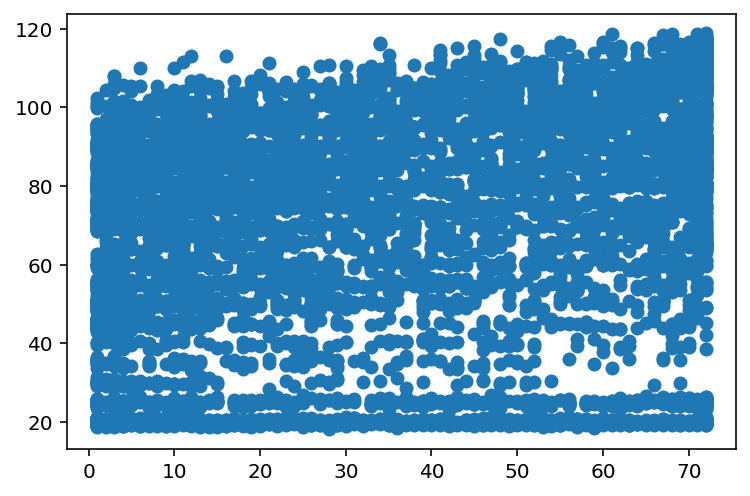

In [127]:
plt.scatter(telco_df.tenure, telco_df.monthly_charges)

In [128]:
stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)

(0.2468617666408935, 3.9898213232673846e-98)

In [ ]:
#There is a weak relation between tenure and monthly charges

- Total charges?

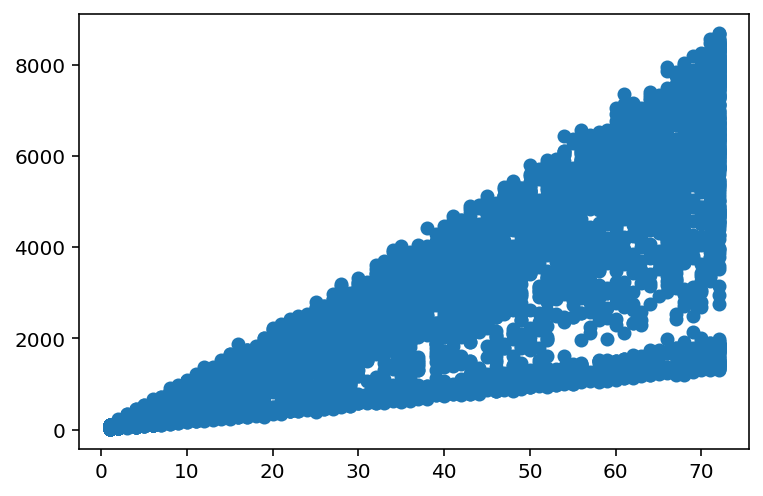

In [129]:
plt.scatter(telco_df.tenure, telco_df.total_charges)

In [130]:
stats.pearsonr(telco_df.tenure, telco_df.total_charges) # strong relation, it does correlate

(0.825880460933202, 0.0)

- What happens if you control for phone and internet service?

In [134]:
telco_df.head(2)

,tenure,monthly_charges,total_charges,phone_service,internet_service_type
0,9,65.6,593.3,Yes,DSL
1,9,59.9,542.4,Yes,DSL


In [142]:
phone_yes = telco_df[telco_df.phone_service == 'Yes'].tenure

In [144]:
phone_no = telco_df[telco_df.phone_service == 'No'].tenure

In [ ]:
#2 sample, 2 tailed T-test. check for p < alpha
#sample size is big, we can assume normaility

$H_0$: there is no difference in tenure length between those who has service and who don't

$H_a$: there is difference in tenure length between those who has service and who don't

In [145]:
stats.levene(phone_yes, phone_no) #we can assume that there is small difference in variances and run the test

LeveneResult(statistic=0.7120196939154351, pvalue=0.3988028480645335)

In [150]:
if(stats.ttest_ind(phone_yes, phone_no)[1] < α):
    print('''
    Reject Null Hypothesis 
    There is a difference in tenure length between those who has service and who don\'t
    ''')
else:
    print('''
    Fail to reject Null Hypothesis  \n
    There is no difference in tenure length between those who has service and who don't
    ''')


    Fail to reject Null Hypothesis  

    There is no difference in tenure length between those who has service and who don't
    


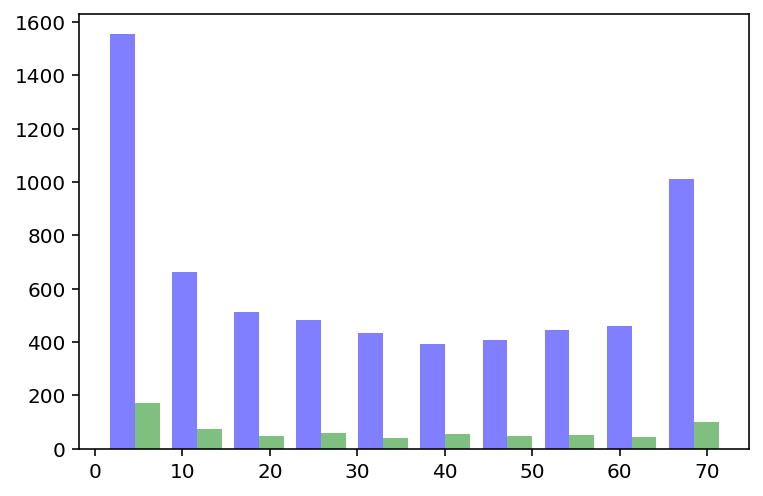

In [162]:
plt.hist([phone_yes, phone_no], color = ['blue', 'green'], alpha = 0.5);

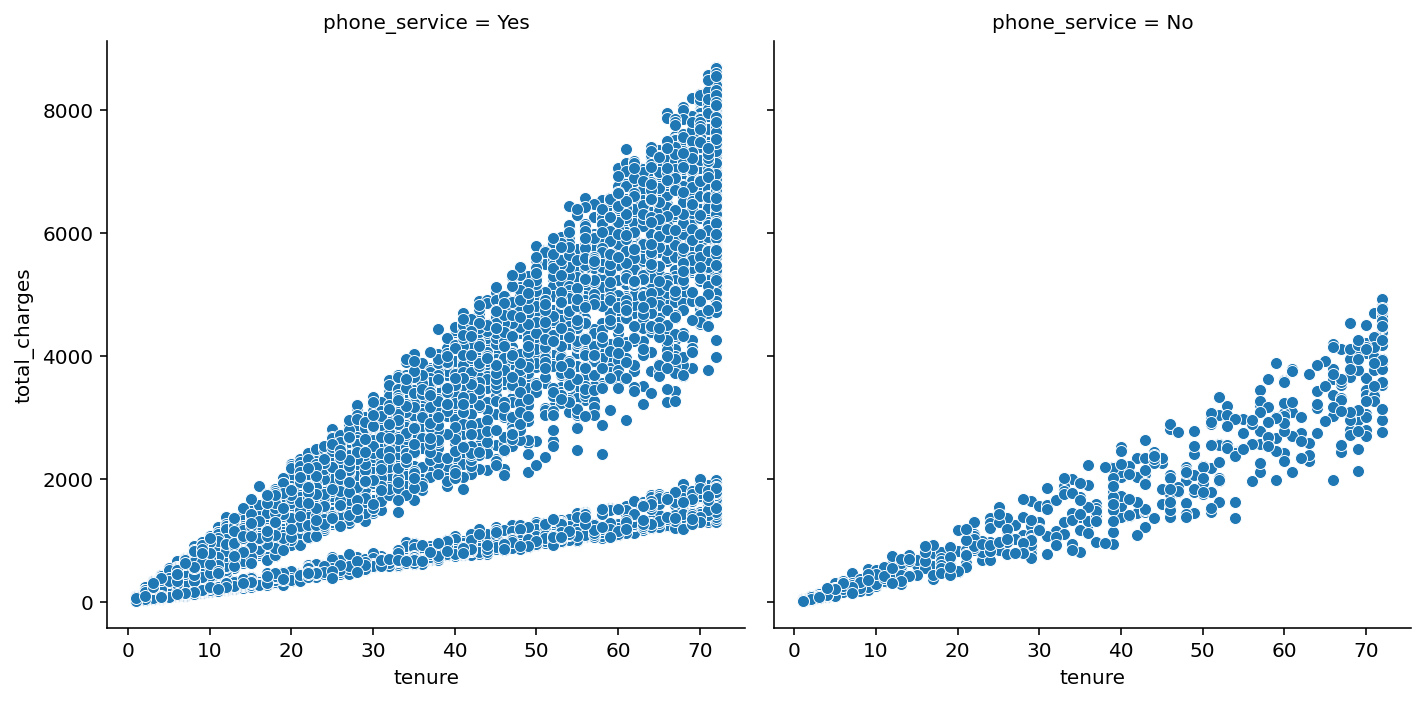

In [177]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='phone_service');

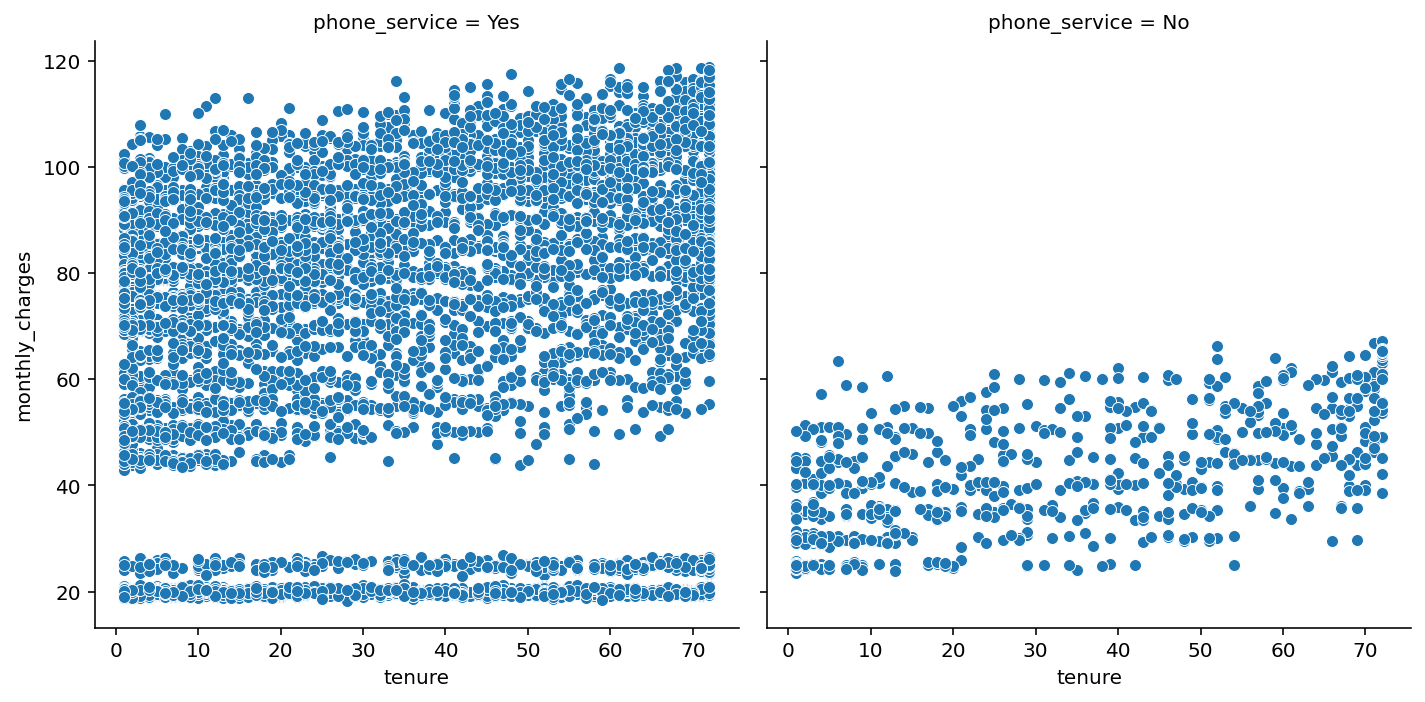

In [178]:
sns.relplot(data=telco_df, y='monthly_charges', x='tenure', col='phone_service');

We can see on the visualizations that there is a strong relationship between total charges and tenure in both cases: with phone service and without phone service. Let's confirm it with Pearson R Test.

In [180]:
phone_serv = telco_df[telco_df.phone_service == 'Yes']
no_phone_serv = telco_df[telco_df.phone_service == 'No']

In [182]:
stats.pearsonr(phone_serv.tenure, phone_serv.total_charges) #0.82

(0.829839321069941, 0.0)

In [185]:
stats.pearsonr(no_phone_serv.tenure, no_phone_serv.total_charges) #0.95

(0.9534228506954516, 0.0)

In [183]:
stats.pearsonr(phone_serv.tenure, phone_serv.monthly_charges) #0.24

(0.24419396575193233, 6.82801603762022e-87)

In [186]:
stats.pearsonr(no_phone_serv.tenure, no_phone_serv.monthly_charges) #0.59

(0.5924298640568983, 1.1732739032891168e-65)

Control for Internet Service

In [164]:
#internet service
telco_df.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

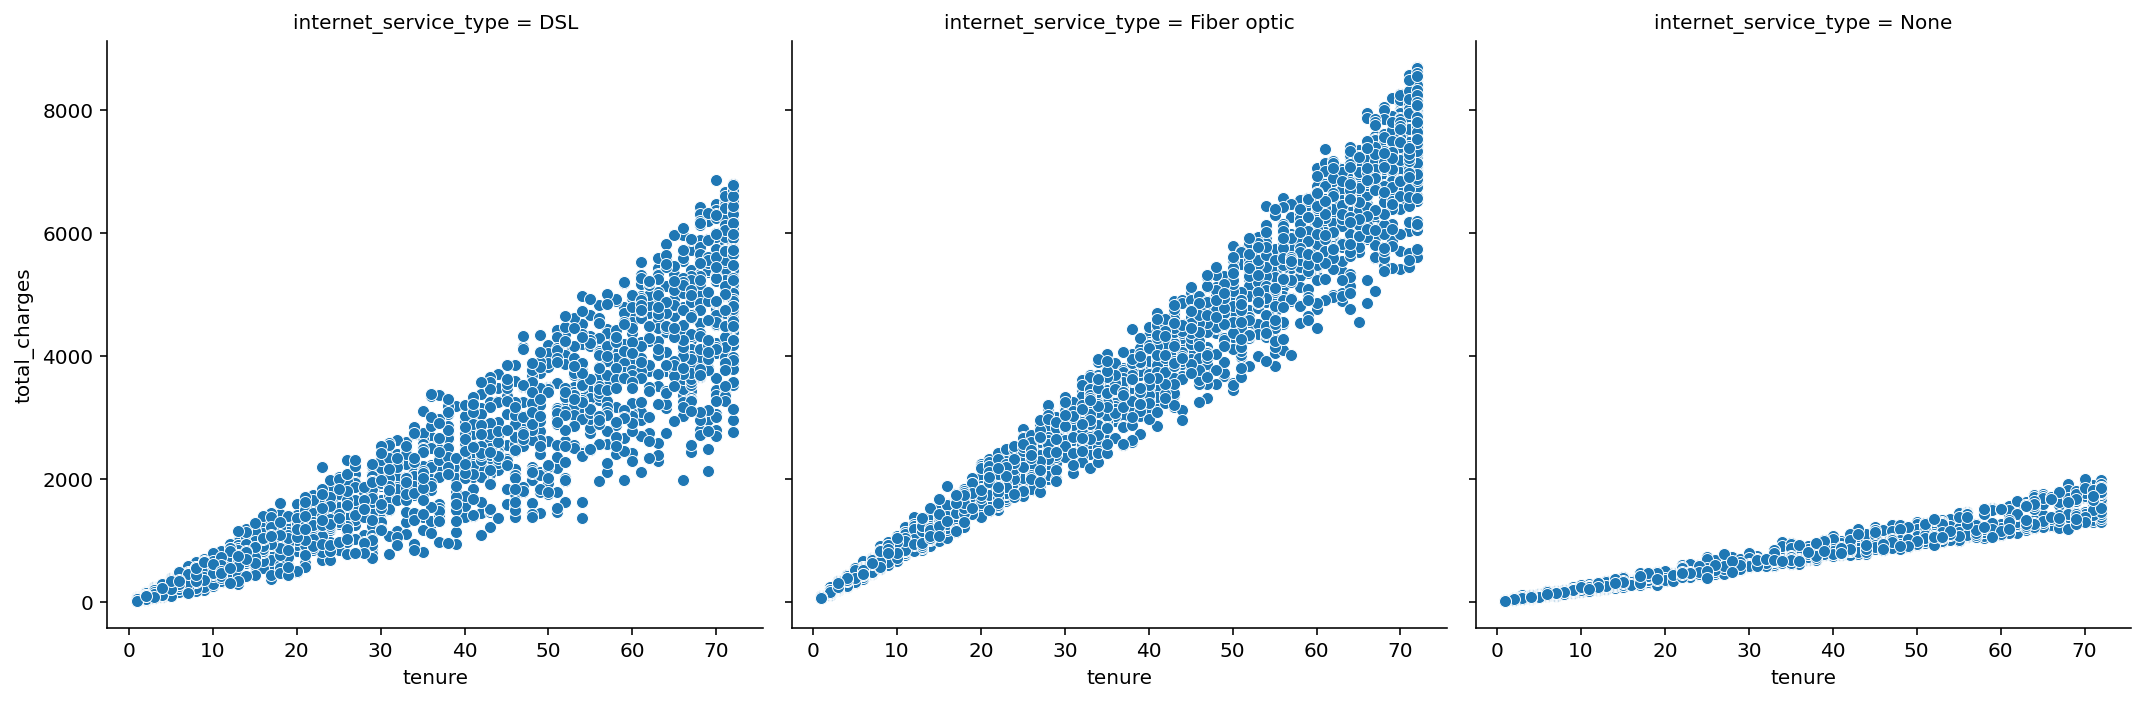

In [187]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='internet_service_type');

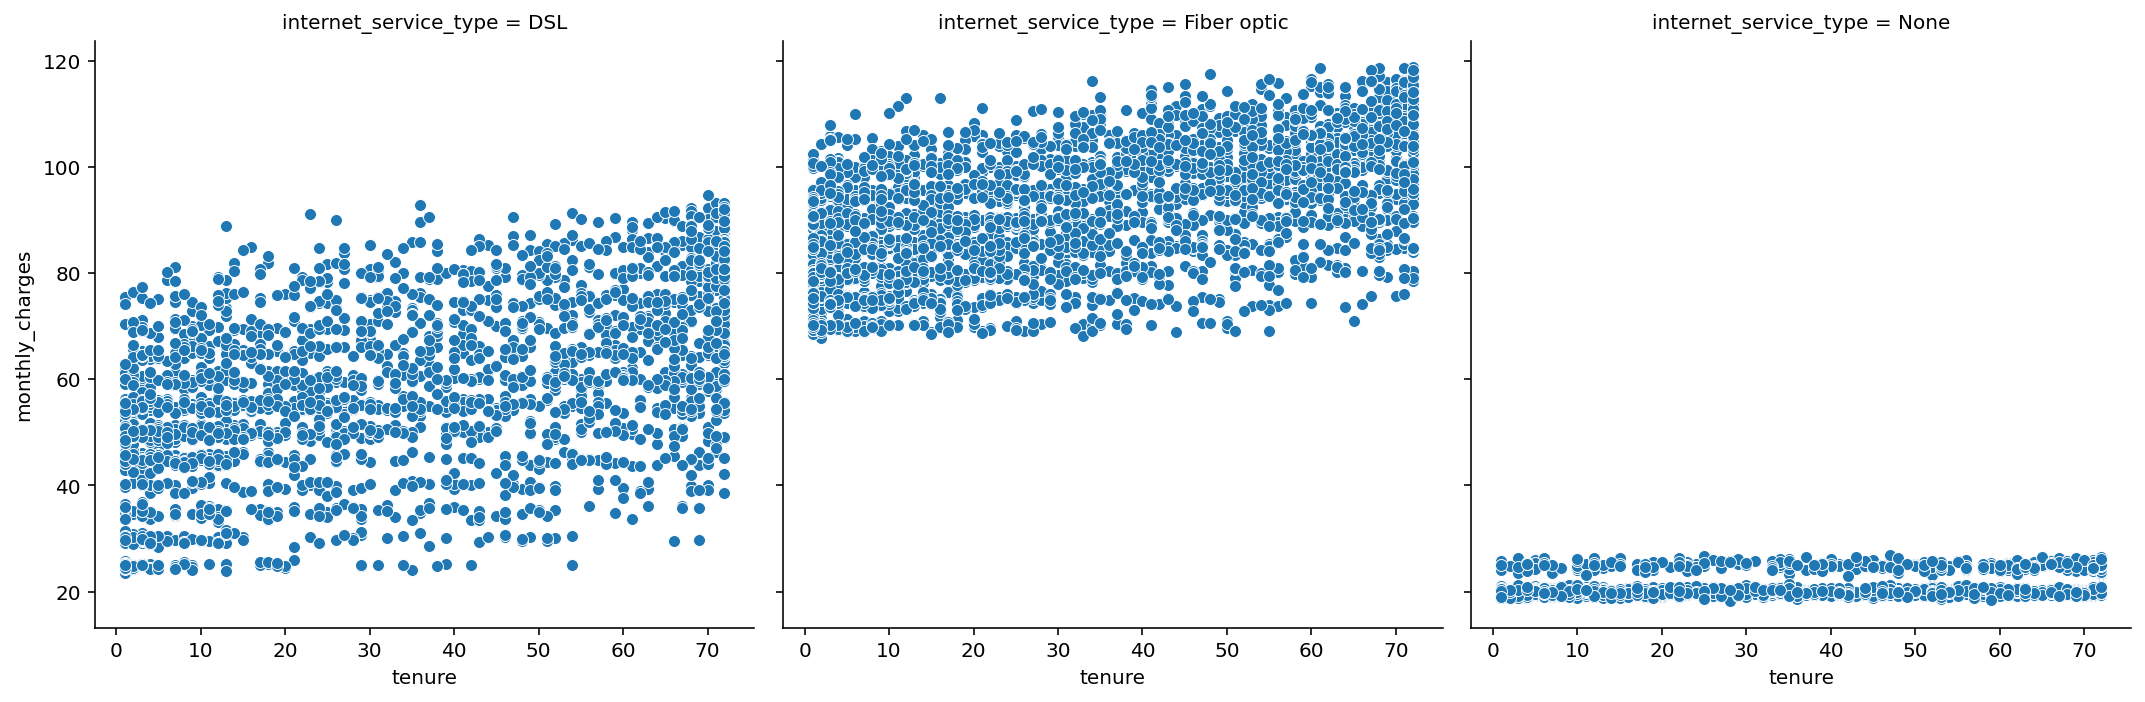

In [188]:
sns.relplot(data=telco_df, y='monthly_charges', x='tenure', col='internet_service_type');

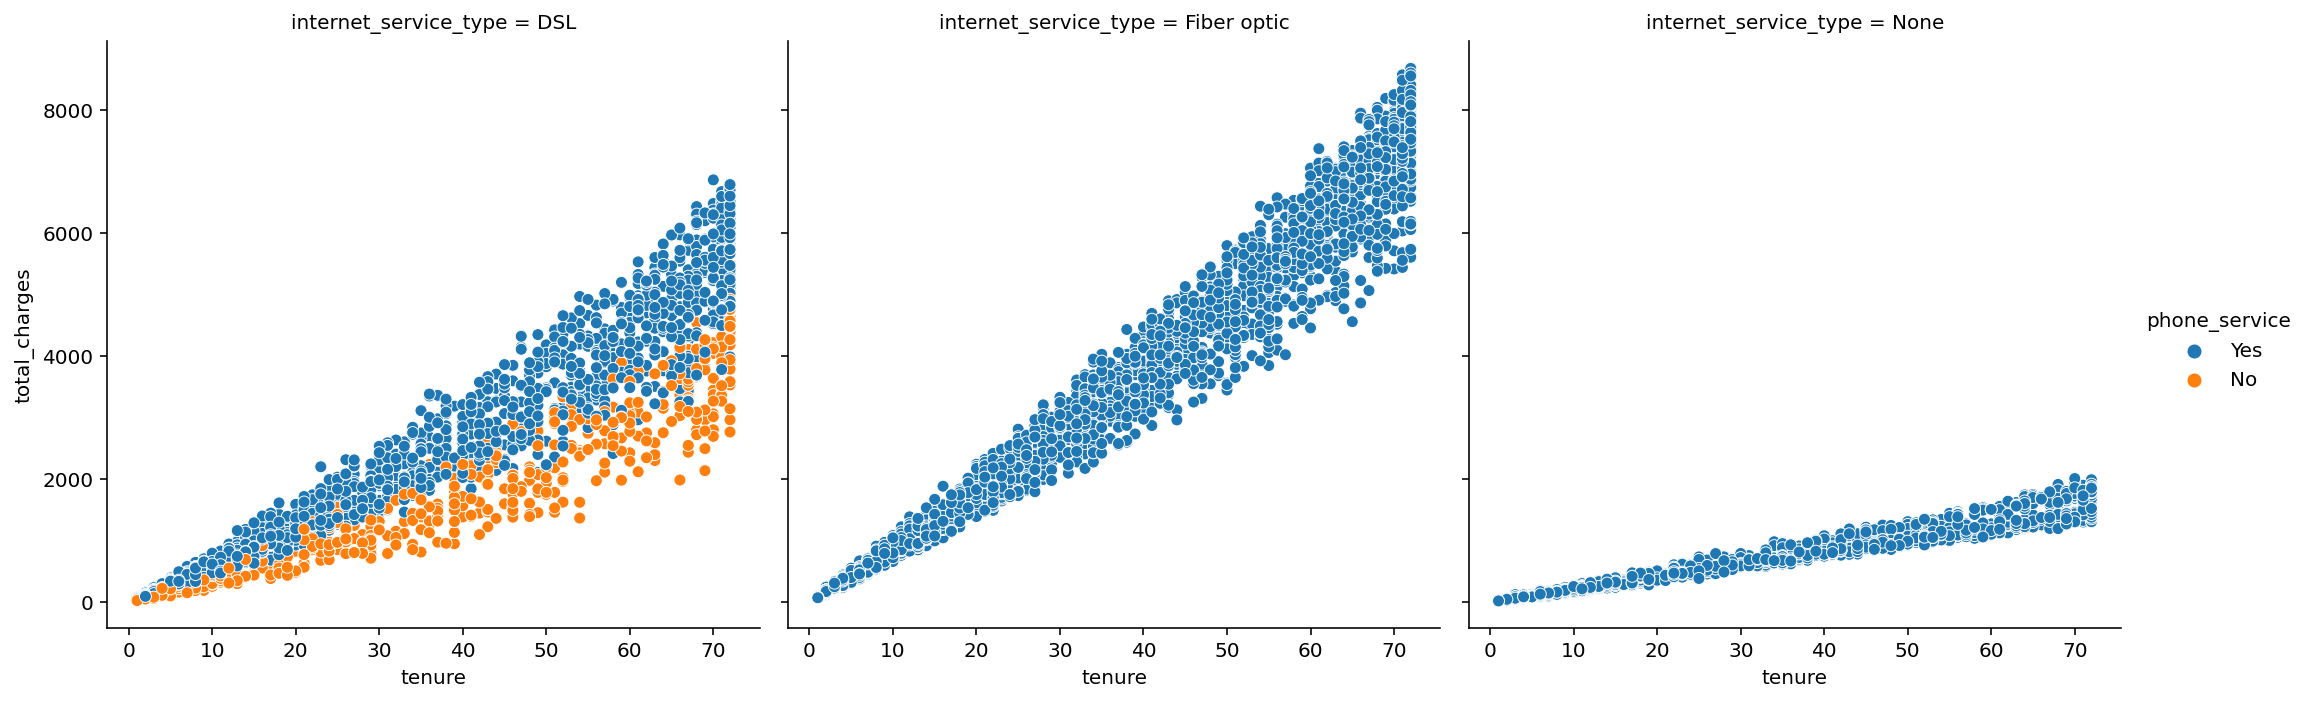

In [190]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='internet_service_type', hue = 'phone_service');

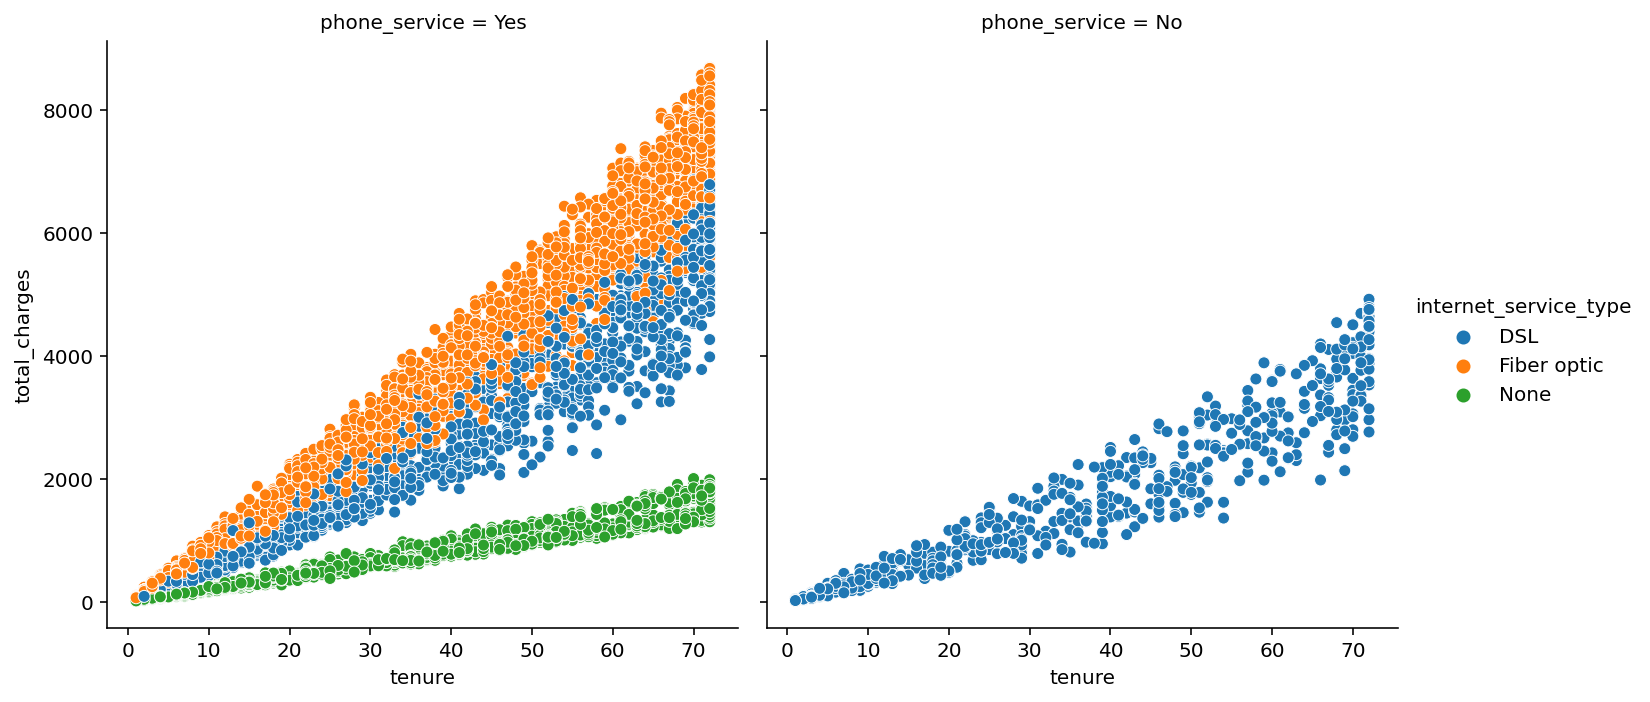

In [191]:
sns.relplot(data=telco_df, y='total_charges', x='tenure', col='phone_service', hue = 'internet_service_type');

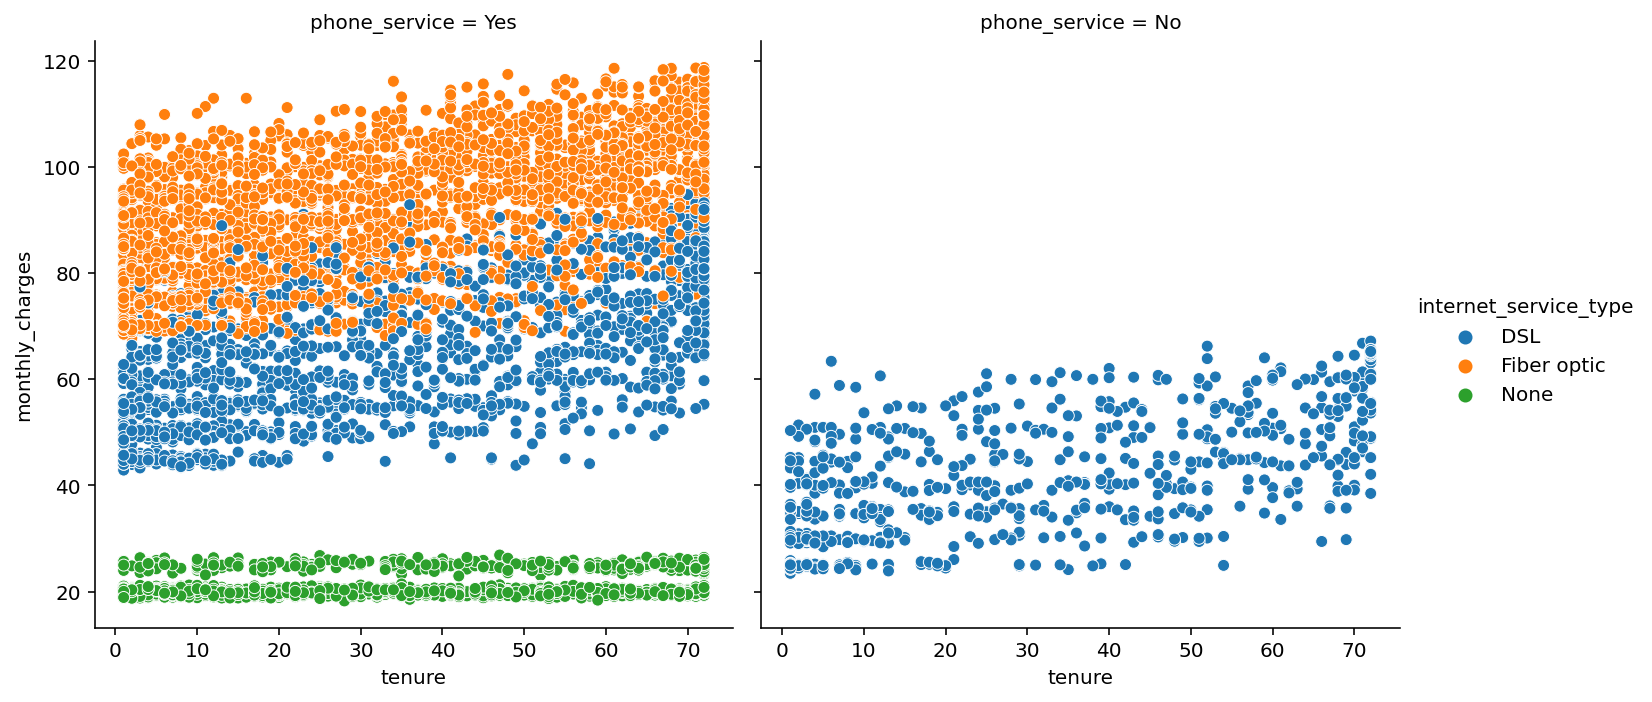

In [192]:
sns.relplot(data=telco_df, y='monthly_charges', x='tenure', col='phone_service', hue = 'internet_service_type');

In [195]:
dsl = telco_df[telco_df.internet_service_type == 'DSL']

In [196]:
fiber = telco_df[telco_df.internet_service_type == 'Fiber optic']

In [199]:
no_internet = telco_df[telco_df.internet_service_type == 'None']

In [201]:
dsl_t, fiber_t, no_internet_t = dsl.tenure, fiber.tenure, no_internet.tenure

In [202]:
#Levene test to check variances equality
stats.levene(dsl_t, fiber_t, no_internet_t) #relatively equal

LeveneResult(statistic=1.7624311690441024, pvalue=0.17170293631107142)

In [203]:
#run ANOVA test
stats.f_oneway(dsl_t, fiber_t, no_internet_t)
#p value < alpha. Means there is a difference in tenure length based on the internet service

F_onewayResult(statistic=4.957780112870394, pvalue=0.0070531107665000835)

In [211]:
#plt.hist(dsl_t, fiber_t, no_internet_t);

In [223]:
#sns.boxplot(data=telco_df, x = 'internet_service_type', y = telco_df.tenure, hue='internet_service_type');

In [224]:
dsl_t.mean(), fiber_t.mean(), no_internet_t.mean() #plotting and checking for means doesn't confirm ANOVA test

(32.88948675496689, 32.91795865633075, 30.667763157894736)

In [225]:
dsl.corr()

,tenure,monthly_charges,total_charges
tenure,1.000000,0.519701,0.941185
monthly_charges,0.519701,1.000000,0.717891
total_charges,0.941185,0.717891,1.000000


In [226]:
fiber.corr()

,tenure,monthly_charges,total_charges
tenure,1.000000,0.624621,0.985309
monthly_charges,0.624621,1.000000,0.713525
total_charges,0.985309,0.713525,1.000000


In [227]:
no_internet.corr()

,tenure,monthly_charges,total_charges
tenure,1.000000,0.346188,0.981465
monthly_charges,0.346188,1.000000,0.484485
total_charges,0.981465,0.484485,1.000000


In [228]:
stats.pearsonr(dsl.total_charges, dsl.tenure)

(0.9411848215629786, 0.0)

In [229]:
stats.pearsonr(fiber.total_charges, fiber.tenure)

(0.9853093528070602, 0.0)

In [230]:
stats.pearsonr(no_internet.total_charges, no_internet.tenure)

(0.9814648859044287, 0.0)

In [233]:
stats.pearsonr(dsl.monthly_charges, dsl.tenure)

(0.5197012004433111, 2.8895185791364017e-167)

In [232]:
stats.pearsonr(fiber.monthly_charges, fiber.tenure)

(0.6246206176175583, 0.0)

In [231]:
stats.pearsonr(no_internet.monthly_charges, no_internet.tenure)

(0.34618773548574655, 4.896604599951957e-44)

3. Use the employees database.

In [16]:
empl_url = get_db_url('employees')
empl_sql = '''
SELECT  s.emp_no, s.salary, t.title, t.from_date, t.to_date
FROM salaries s
JOIN titles t USING(emp_no)
'''

emp_sql_all = '''
SELECT  e.emp_no, e.hire_date,  s.salary, t.title, t.from_date, t.to_date
FROM employees e
JOIN salaries s USING (emp_no)
JOIN titles t USING(emp_no)
'''

sql_salaries = '''
SELECT e.emp_no, e.hire_date, AVG(s.salary) as avg_salary, MAX(s.to_date) as max_date
FROM employees e
JOIN salaries s USING(emp_no)
GROUP BY e.emp_no;
'''

sql_titles = '''
SELECT e.emp_no, e.hire_date, COUNT(t.title) as count_titles, MAX(t.to_date) as max_date
FROM employees e
JOIN titles t USING(emp_no)
GROUP BY e.emp_no;
'''

In [17]:
emp_salaries = pd.read_sql(sql_salaries, empl_url)

In [18]:
emp_titles = pd.read_sql( sql_titles, empl_url)

In [20]:
emp_salaries.describe()

,emp_no,avg_salary
count,300024.000000,300024.000000
mean,253321.763392,61451.787823
std,161828.235540,15244.082250
min,10001.000000,39299.500000
25%,85006.750000,49641.659125
50%,249987.500000,57839.923300
75%,424993.250000,70701.850000
max,499999.000000,141835.333300


In [ ]:
emp_salaries.info()

In [19]:
emp_titles.describe()

,emp_no,count_titles
count,300024.000000,300024.000000
mean,253321.763392,1.477575
std,161828.235540,0.519220
min,10001.000000,1.000000
25%,85006.750000,1.000000
50%,249987.500000,1.000000
75%,424993.250000,2.000000
max,499999.000000,3.000000


In [21]:
emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   emp_no        300024 non-null  int64 
 1   hire_date     300024 non-null  object
 2   count_titles  300024 non-null  int64 
 3   max_date      300024 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.2+ MB


In [22]:
emp_salaries.head()

,emp_no,hire_date,avg_salary,max_date
0,10001,1986-06-26,75388.9412,9999-01-01
1,10002,1985-11-21,68854.5000,9999-01-01
2,10003,1986-08-28,43030.2857,9999-01-01
3,10004,1986-12-01,56512.2500,9999-01-01
4,10005,1989-09-12,87275.7692,9999-01-01


In [23]:
emp_titles.head()

,emp_no,hire_date,count_titles,max_date
0,10001,1986-06-26,1,9999-01-01
1,10002,1985-11-21,1,9999-01-01
2,10003,1986-08-28,1,9999-01-01
3,10004,1986-12-01,2,9999-01-01
4,10005,1989-09-12,2,9999-01-01


- Is there a relationship between how long an employee has been with the company and their salary?

In [24]:
import datetime as dt

In [25]:
unique_dates = emp_salaries.max_date.sort_values(ascending=False).unique()

In [27]:
unique_dates[:5]

array([datetime.date(9999, 1, 1), datetime.date(2002, 8, 1),
       datetime.date(2002, 7, 31), datetime.date(2002, 7, 30),
       datetime.date(2002, 7, 29)], dtype=object)

In [73]:
to_date = unique_dates[0]
max_date = unique_dates[1]
set_date = max_date + dt.timedelta(days = 370)

In [74]:
#in the database change the to_date from 9999 to Aug, 2, 2002
emp_salaries['max_date'] = np.where(emp_salaries.max_date == to_date, 
                             set_date, emp_salaries.max_date)

In [75]:
emp_salaries.head()

,emp_no,hire_date,avg_salary,max_date,days_worked,days_worked_text
0,10001,1986-06-26,75388.9412,2003-08-01,6245,6245 days
1,10002,1985-11-21,68854.5000,2003-08-01,6462,6462 days
2,10003,1986-08-28,43030.2857,2003-08-01,6182,6182 days
3,10004,1986-12-01,56512.2500,2003-08-01,6087,6087 days
4,10005,1989-09-12,87275.7692,2003-08-01,5071,5071 days


In [76]:
emp_salaries['days_worked_text'] = (emp_salaries.max_date - emp_salaries.hire_date).astype(str)
emp_salaries['days_worked'] = emp_salaries.days_worked_text.str.replace(' days', '').astype(int)
emp_salaries.head()

,emp_no,hire_date,avg_salary,max_date,days_worked,days_worked_text
0,10001,1986-06-26,75388.9412,2003-08-01,6245,6245 days
1,10002,1985-11-21,68854.5000,2003-08-01,6462,6462 days
2,10003,1986-08-28,43030.2857,2003-08-01,6182,6182 days
3,10004,1986-12-01,56512.2500,2003-08-01,6087,6087 days
4,10005,1989-09-12,87275.7692,2003-08-01,5071,5071 days


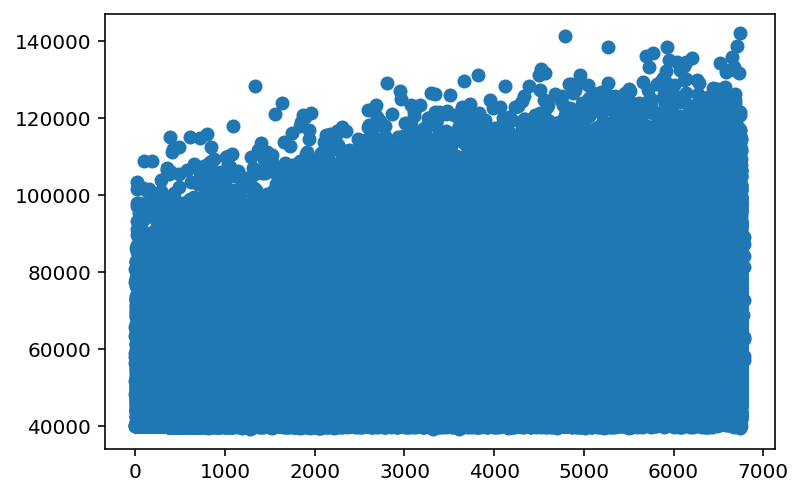

In [50]:
plt.scatter(y = emp_salaries.avg_salary, x = emp_salaries.days_worked)

In [77]:
#run the Pearson R test to find if there is a correlation between a salary and how long emp worked
stats.pearsonr(emp_salaries.avg_salary, emp_salaries.days_worked)

(0.2170006200499887, 0.0)

There is some relationship but it is not very strong

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [52]:
emp_titles.head()

,emp_no,hire_date,count_titles,max_date
0,10001,1986-06-26,1,9999-01-01
1,10002,1985-11-21,1,9999-01-01
2,10003,1986-08-28,1,9999-01-01
3,10004,1986-12-01,2,9999-01-01
4,10005,1989-09-12,2,9999-01-01


In [53]:
#I need to replace 9999 dates with the real date, I'll use same vars max_date, set_date from the previous table

In [56]:
#to_date = unique_dates[0]
#max_date = unique_dates[1]
#set_date = max_date + dt.timedelta(days = 365)

In [79]:
emp_titles['max_date'] = np.where(emp_titles.max_date == to_date, 
                             set_date, emp_titles.max_date)
emp_titles.head()

,emp_no,hire_date,count_titles,max_date,days_worked_text
0,10001,1986-06-26,1,2003-08-06,2926512 days
1,10002,1985-11-21,1,2003-08-06,2926729 days
2,10003,1986-08-28,1,2003-08-06,2926449 days
3,10004,1986-12-01,2,2003-08-06,2926354 days
4,10005,1989-09-12,2,2003-08-06,2925338 days


In [81]:
emp_titles['days_worked_text'] = (emp_titles.max_date - emp_titles.hire_date).astype(str)

emp_titles['days_worked'] = emp_titles.days_worked_text.str.replace(' days', '').astype(int)
emp_titles.head()

,emp_no,hire_date,count_titles,max_date,days_worked_text,days_worked
0,10001,1986-06-26,1,2003-08-06,6250 days,6250
1,10002,1985-11-21,1,2003-08-06,6467 days,6467
2,10003,1986-08-28,1,2003-08-06,6187 days,6187
3,10004,1986-12-01,2,2003-08-06,6092 days,6092
4,10005,1989-09-12,2,2003-08-06,5076 days,5076


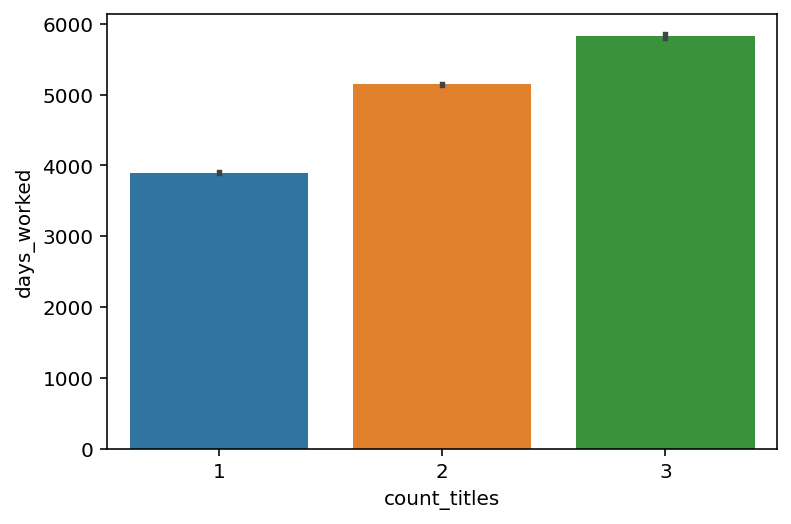

In [85]:
sns.barplot(data = emp_titles, y = 'days_worked', x = 'count_titles');

There is a relation between number of titles and days the employee work in the company

In [86]:
stats.pearsonr(emp_titles.count_titles, emp_titles.days_worked)

(0.3909142266416765, 0.0)

4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [87]:
sleep_df = data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [88]:
stats.pearsonr(sleep_df.Reaction, sleep_df.Days)

(0.5352302262650253, 9.894096322214812e-15)

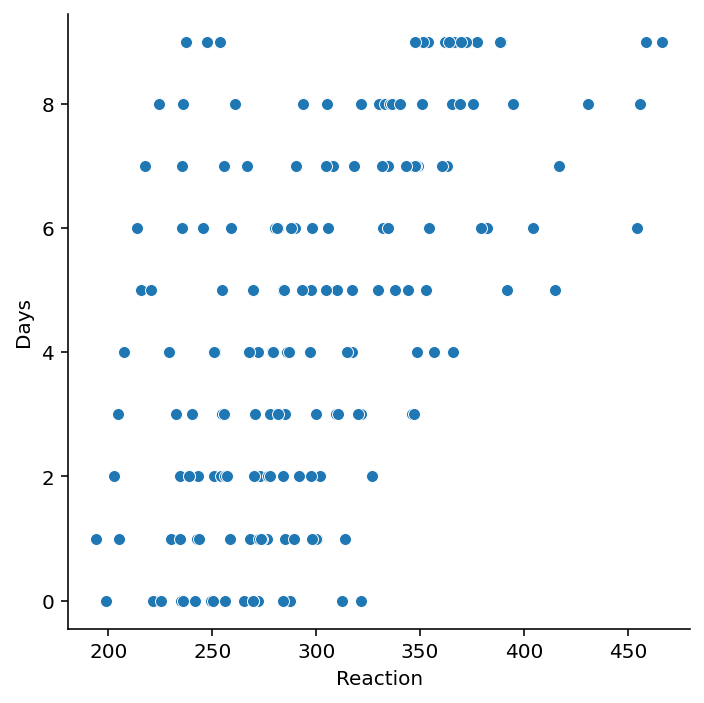

In [89]:
sns.relplot(data = sleep_df, x = 'Reaction', y = 'Days');